In [8]:
# TODO get a lens from the sample then save it locally

# TODO have a version of the lens with and without substructure i.e. need clean model

In [9]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [10]:
import os
import sys

import matplotlib.pyplot as plt
from hydra import initialize, compose
from pyHalo.preset_models import CDM
from glob import glob
import pickle
import numpy as np

from lenstronomy.Plots import plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import lens_util, test
from mejiro.plots import plot, overplot
from mejiro.utils import util
from mejiro.helpers import color, pandeia_input
from mejiro.helpers.pandeia_output import PandeiaOutput

In [11]:
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
figure_dir = os.path.join(repo_dir, 'figures')

In [12]:
lens_dict, _, _ = test.get_sample(config.machine.sample_dir, config.machine.color_dir, 191)
lens = lens_dict['lens']
array = lens_dict['model']

In [13]:
calc, _ = pandeia_input.build_pandeia_calc(array, lens, band='f106', max_scene_size=10., num_samples=10000, suppress_output=False)

  1%|          | 16/1511 [00:00<00:09, 158.33it/s]

100%|██████████| 1511/1511 [00:09<00:00, 163.44it/s]

Point source conversion complete: placed 1511 point sources
Estimated calculation time: 0:01:59


In [14]:
# generate Pandeia image and save
image, execution_time = pandeia_input.get_pandeia_image(calc, suppress_output=False)

Performing Pandeia calculation...
Pandeia calculation complete in 0:03:44


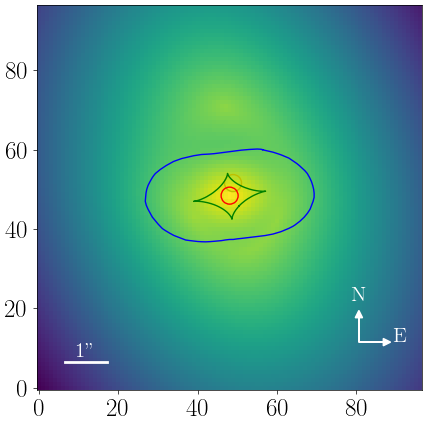

In [15]:
(size, size) = array.shape

f, ax = plt.subplots(figsize=(5,5))
plot_util.scale_bar(ax, d=size, dist=size * 0.11, text='1"', color='w', font_size=15, flipped=False)
plot_util.coordinate_arrows(ax, d=size * .95, coords=lens.coords, color='w', font_size=15, arrow_size=0.02)
overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)
ax.imshow(np.log10(array))

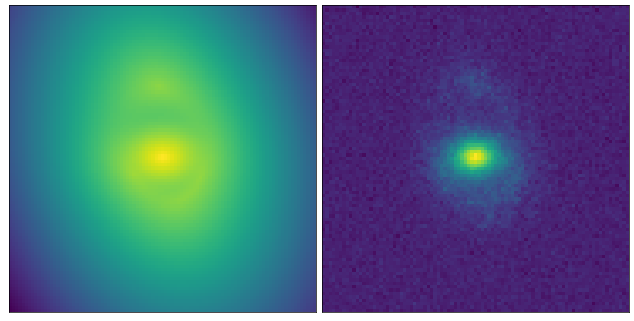

In [16]:
plot.plot_list([np.log10(array), np.log10(image)])